<a href="https://colab.research.google.com/github/jhk990602/datapractice/blob/main/DecisionTreeClassifier(iris_data).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

#DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

#붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 세트로 분리
iris_data = load_iris()
X_train,X_test,y_train,y_test = train_test_split(iris_data.data,iris_data.target,test_size=0.2, random_state=11)

#DecisionTreeClassifier 학습
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=156)

In [4]:
from sklearn.tree import export_graphviz

#export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일생성
export_graphviz(dt_clf,out_file='tree.dot',class_names=iris_data.target_names,feature_names=iris_data.feature_names,impurity=True,filled=True)

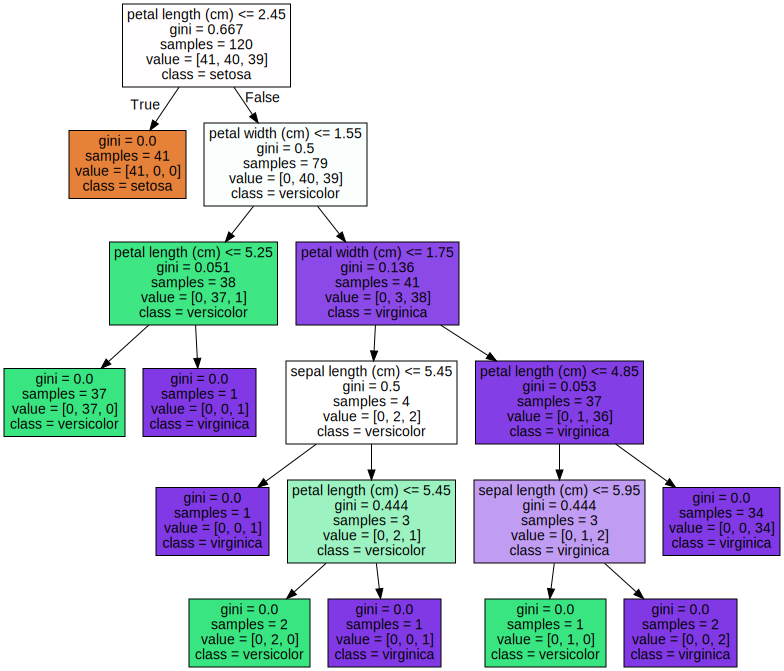

In [5]:
import graphviz
#위에서 생성된 tree.dot파일을 Graphviz가 읽어서 노트북 상에서 시각화
with open('tree.dot') as f:
  dot_graph=f.read()
graphviz.Source(dot_graph)

Feature importances: 
[0.025 0.    0.555 0.42 ]
sepal length (cm):0.025
sepal width (cm):0.000
petal length (cm):0.555
petal width (cm):0.420


<Axes: >

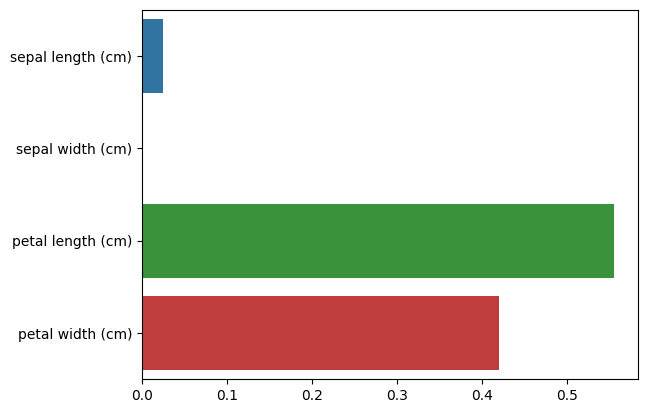

In [9]:
import seaborn as sns
import numpy as np
%matplotlib inline

#feature importance 추출
print('Feature importances: \n{0}'.format(np.round(dt_clf.feature_importances_,3)))

#feature별 importance 매핑
for name,value in zip(iris_data.feature_names, dt_clf.feature_importances_):
  print('{0}:{1:.3f}'.format(name,value))

#feature importance를 column 별로 시각화하기
sns.barplot(x=dt_clf.feature_importances_,y=iris_data.feature_names)